# Genshin Artifact Transmuter Project

##  Introduction
In this project, we determine Genshin Impact's Artifact Transmuter and its efficiency compared to normal artifact gathering methods.\
\
The Artifact Transmuter is a tool that allows players to generate an artifact with their choice of slot, main stat and two sub-stat affixes.
This is opposed to the complete randomness of artifacts generated from running regular domains.\
\
In the recent 5.5 update, the developers made it so the Artifact Transmuter guaranteed two rolls into the two sub-stat affixes when leveling up. From seen online, 1 roll goes into each sub-stat, totaling two.\
\
Before the update, many players did not deem it worth it, but now players are wondering if it is worth it considering the changes. This project aims to answer that question.

## Preface
This project assumes that the reader is familiar with the Artifact System. If unfamiliar, please check the sources the README.md


## Starting the Project

This project builds off of iWinToLoseGaming's Transmuter analysis on YouTube. In one point of the video, he provides a spreadsheet of his findings. The plan is to build off the spreadsheet and add the discussion of crit value.

In [1]:
import pandas as pd

# Each row of data corresponds to one of the 25 lines in the image.
# (Note: The numeric values below come from the image’s calculations.
#  For example, Resin Cost = Avg Runs × 20,
#  Days = round(Resin Cost ÷ 120),
#  Mora = Resin Cost × 100, etc.)
data = [
    # Flower & Feather rows
    ["Flower", 10.0, "Flat HP", 100,       9.2, 1.065, 0.980,  102, 2040,   20.4,  10.8,  1, 2041],
    ["Feather", 10.0, "Flat ATK", 100,    9.2, 1.065, 0.980,  102, 2040,   20.4,  10.8,  1, 2041],
    # Timepiece rows
    ["Timepiece", 10.0, "HP%", 26.7,          8.3, 1.065, 0.236,  424, 8480,   84.8,  45.0, 2, 4240],
    ["Timepiece", 10.0, "ATK%", 26.7,         8.3, 1.065, 0.236,  424, 8480,   84.8,  45.0, 2, 4243],
    ["Timepiece", 10.0, "DEF%",  26.7,        8.3, 1.065, 0.236,  424, 8480,   84.8,  45.0, 2, 4243],
    ["Timepiece", 10.0, "Energy Recharge", 10, 8.3, 1.065, 0.088, 1131, 22620, 226.2, 120.0, 2, 11313],
    ["Timepiece", 10.0, "Elemental Mastery", 10, 8.3,1.065, 0.088, 1131, 22620, 226.2, 120.0, 2, 11313],
    # Goblet rows
    ["Goblet", 10.0, "HP%", 19.25,             8.3, 1.065, 0.170,  588, 11760, 117.6,  62.3, 4, 2938],
    ["Goblet", 10.0, "ATK%", 19.25,            8.3, 1.065, 0.170,  588, 11760, 117.6,  62.3, 4, 2938],
    ["Goblet", 10.0, "DEF%", 19.,            8.3, 1.065, 0.168,  595, 11900, 119.0,  62.1,  4, 2977],
    ["Goblet", 10.0, "Pyro DMG", 5,         6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3,  4, 14014],
    ["Goblet", 10.0, "Electro DMG", 5,    6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3,  4, 14014],
    ["Goblet", 10.0, "Cryo DMG", 5,        6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3,  4, 14014],
    ["Goblet", 10.0, "Hydro DMG",  5,      6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3,  4, 14014],
    ["Goblet", 10.0, "Anemo DMG", 5,       6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3,  4, 14014],
    ["Goblet", 10.0, "Geo DMG", 5,          6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3, 4, 14014],
    ["Goblet", 10.0, "Dendro DMG", 5,          6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3, 4, 14014],
    ["Goblet", 10.0, "Physical DMG", 5,    6.7, 1.065, 0.036, 2803, 56060, 560.6, 297.3, 4, 14014],
    ["Goblet", 10.0, "Elemental Mastery", 2.5, 8.3, 1.065, 0.022, 4525, 90500, 905.0, 479.9, 4, 22626],
    # Circlet rows
    ["Circlet", 10.0, "HP%", 22,            8.3, 1.065, 0.194,  514, 10280, 102.8,  54.5,  3, 3428],
    ["Circlet", 10.0, "ATK%", 22,           8.3, 1.065, 0.194,  514, 10280, 102.8,  54.5,  3, 3428],
    ["Circlet", 10.0, "DEF%", 22,           8.3, 1.065, 0.194,  514, 10280, 102.8,  54.5, 3, 3428],
    ["Circlet", 10.0, "CRIT Rate", 10,      32.0,1.065, 0.341,  293, 5860,   58.6,  31.1, 3, 1956],
    ["Circlet", 10.0, "CRIT DMG", 10,       32.0,1.065, 0.341,  293, 5860,   58.6,  31.1,  3, 1956],
    ["Circlet", 10.0, "Healing Bonus", 10,   6.7, 1.065, 0.071, 1401, 28020, 280.2, 146.6, 3, 9343],
    ["Circlet", 10.0, "Elemental Mastery", 4, 8.3, 1.065, 0.035, 2828, 56560, 565.6, 300.0, 3, 18855]
]

columns = [
    "Base Piece",
    "Base Piece2",
    "Main Stat",
    "Main Stat%",
    "Double Crit",
    "Drops / Run",
    "Chance / Run",
    "Avg Runs",
    "Resin Cost",      
    "Resin Value",     
    "Days",            
    "Elixirs",         
    "Resin/Elixir"     
]

df = pd.DataFrame(data, columns=columns)
df

df_indexed = df.set_index(["Base Piece", "Main Stat"])

# Optional: sort by index for better organization
df_indexed 

Base Piece2  Main Stat%  Double Crit  \
Base Piece Main Stat                                                 
Flower     Flat HP                   10.0      100.00          9.2   
Feather    Flat ATK                  10.0      100.00          9.2   
Timepiece  HP%                       10.0       26.70          8.3   
           ATK%                      10.0       26.70          8.3   
           DEF%                      10.0       26.70          8.3   
           Energy Recharge           10.0       10.00          8.3   
           Elemental Mastery         10.0       10.00          8.3   
Goblet     HP%                       10.0       19.25          8.3   
           ATK%                      10.0       19.25          8.3   
           DEF%                      10.0       19.00          8.3   
           Pyro DMG                  10.0        5.00          6.7   
           Electro DMG               10.0        5.00          6.7   
           Cryo DMG                  10.0        5.00          6.7   
           Hydro DMG                 10.0        5.00          6.7   
           Anemo DMG                 10.0        5.00          6.7   
           Geo DMG                   10.0        5.00          6.7   
           Dendro DMG                10.0        5.00          6.7   
           Physical DMG              10.0        5.00          6.7   
           Elemental Mastery         10.0        2.50          8.3   
Circlet    HP%                       10.0       22.00          8.3   
           ATK%                      10.0       22.00          8.3   
           DEF%                      10.0       22.00          8.3   
           CRIT Rate                 10.0       10.00         32.0   
           CRIT DMG                  10.0       10.00         32.0   
           Healing Bonus             10.0       10.00          6.7   
           Elemental Mastery         10.0        4.00          8.3   

                              Drops / Run  Chance / Run  Avg Runs  Resin Cost  \
Base Piece Main Stat                                                            
Flower     Flat HP                  1.065         0.980       102        2040   
Feather    Flat ATK                 1.065         0.980       102        2040   
Timepiece  HP%                      1.065         0.236       424        8480   
           ATK%                     1.065         0.236       424        8480   
           DEF%                     1.065         0.236       424        8480   
           Energy Recharge          1.065         0.088      1131       22620   
           Elemental Mastery        1.065         0.088      1131       22620   
Goblet     HP%                      1.065         0.170       588       11760   
           ATK%                     1.065         0.170       588       11760   
           DEF%                     1.065         0.168       595       11900   
           Pyro DMG                 1.065         0.036      2803       56060   
           Electro DMG              1.065         0.036      2803       56060   
           Cryo DMG                 1.065         0.036      2803       56060   
           Hydro DMG                1.065         0.036      2803       56060   
           Anemo DMG                1.065         0.036      2803       56060   
           Geo DMG                  1.065         0.036      2803       56060   
           Dendro DMG               1.065         0.036      2803       56060   
           Physical DMG             1.065         0.036      2803       56060   
           Elemental Mastery        1.065         0.022      4525       90500   
Circlet    HP%                      1.065         0.194       514       10280   
           ATK%                     1.065         0.194       514       10280   
           DEF%                     1.065         0.194       514       10280   
           CRIT Rate                1.065         0.341       293        5860   
           CRIT DMG                 1.065   

The project will build a similar table. This table will focus on crit value derived and its efficiency.

In [2]:
df2 = df_indexed.copy()
df2 = df2.loc[:, ['Base Piece2', 'Main Stat%', 'Double Crit', 'Drops / Run', 'Elixirs']]
df2

Base Piece2  Main Stat%  Double Crit  \
Base Piece Main Stat                                                 
Flower     Flat HP                   10.0      100.00          9.2   
Feather    Flat ATK                  10.0      100.00          9.2   
Timepiece  HP%                       10.0       26.70          8.3   
           ATK%                      10.0       26.70          8.3   
           DEF%                      10.0       26.70          8.3   
           Energy Recharge           10.0       10.00          8.3   
           Elemental Mastery         10.0       10.00          8.3   
Goblet     HP%                       10.0       19.25          8.3   
           ATK%                      10.0       19.25          8.3   
           DEF%                      10.0       19.00          8.3   
           Pyro DMG                  10.0        5.00          6.7   
           Electro DMG               10.0        5.00          6.7   
           Cryo DMG                  10.0        5.00          6.7   
           Hydro DMG                 10.0        5.00          6.7   
           Anemo DMG                 10.0        5.00          6.7   
           Geo DMG                   10.0        5.00          6.7   
           Dendro DMG                10.0        5.00          6.7   
           Physical DMG              10.0        5.00          6.7   
           Elemental Mastery         10.0        2.50          8.3   
Circlet    HP%                       10.0       22.00          8.3   
           ATK%                      10.0       22.00          8.3   
           DEF%                      10.0       22.00          8.3   
           CRIT Rate                 10.0       10.00         32.0   
           CRIT DMG                  10.0       10.00         32.0   
           Healing Bonus             10.0       10.00          6.7   
           Elemental Mastery         10.0        4.00          8.3   

                              Drops / Run  Elixirs  
Base Piece Main Stat                                
Flower     Flat HP                  1.065        1  
Feather    Flat ATK                 1.065        1  
Timepiece  HP%                      1.065        2  
           ATK%                     1.065        2  
           DEF%                     1.065        2  
           Energy Recharge          1.065        2  
           Elemental Mastery        1.065        2  
Goblet     HP%                      1.065        4  
           ATK%                     1.065        4  
           DEF%                     1.065        4  
           Pyro DMG                 1.065        4  
           Electro DMG              1.065        4  
           Cryo DMG                 1.065        4  
           Hydro DMG                1.065        4  
           Anemo DMG                1.065        4  
           Geo DMG                  1.065        4  
           Dendro DMG               1.065        4  
           Physical DMG             1.065        4  
           Elemental Mastery        1.065        4  
Circlet    HP%                      1.065        3  
           ATK%                     1.065        3  
           DEF%                     1.065        3  
           CRIT Rate                1.065        3  
           CRIT DMG                 1.065        3  
           Healing Bonus            1.065        3  
           Elemental Mastery        1.065        3

We want to add one column to evaluate the crit value. The column will be the chance of getting 30+ crit value. This will take into account that the artifact will also have double crit. Since there are so many variables in calculating the percentage chance of getting 30+ cv and that I am bad at statistics, the Monte Carlo simulations to estimate the probability. I have chosen to use 300000 simualtions as python is extremely slow. Behind the scenes, I tried many things to make the process faster: Tried optimizing my class, Rewrote the class twice, rewrote the class into a function approach, Tried many python libraries said to improve speed, but ultimately none of those worked, so I bit the bullet. In the future, I'll revisit this project in C++, which might allow faster simulations and overall allow large simulation sizes. I planned to do 5,000,000 simulations, but settled for 300,000.

In [3]:
# Necessary Imports
from Artifact import Artifact, Transmuter
import numpy as np

# Generate 
simulations = 300000

slots = ['Feather', 'Flower', 'Sands', 'Circlet', 'Goblet']
artifact_lists = {slot: [] for slot in slots}

for _ in range(simulations):
    for slot in slots:
        a = Artifact(slot=slot)
        a.level_up_max()
        if slot == 'Circlet' and a.main_stat in ['CRIT Rate%', 'CRIT DMG%']:
            if a.crit_value() >= 20:
                artifact_lists[slot].append(a)
        else:
            if a.crit_value() >= 30:
                artifact_lists[slot].append(a)

After generating all those artifacts into a dictionary with their respective slot, we then transform the data into a list or series to match the overall DataFrame. This series will represent the chance of getting a 30+ cv artifact of certain specifications. However, for circlets, it will be a little bit different. Circlets can have Crit main stat and that portion is not calculated in the crit value calculations. Without considering this, the overall cv of crit circlets will be lower. Consulting friends and online forums, many consider 20 cv is a very good cv for a circlet so we will use that here.

In [4]:
# Creating the series to add to the dataframe.
import math

# Average the elemental goblet percentages because they all have the same base probability.
# This will result in a more accurate chance.
element_goblets = [round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'PyroDMG%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'ElectroDMG%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'CryoDMG%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'HydroDMG%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'AnemoDMG%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'GeoDMG%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'DendroDMG%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'PhysicalDMG%'])/simulations * 100, 3)]
ele_goblets_average = round(sum(element_goblets) / len(element_goblets), 3)

# 
crit = [round(len([a for a in artifact_lists['Circlet'] if a.main_stat == 'CRIT Rate%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Circlet'] if a.main_stat == 'CRIT DMG%'])/simulations * 100, 3)]

crit_average = round((sum(crit) / len(crit)), 3)


crit_value_column = [
    round(len(artifact_lists['Feather'])/simulations * 100, 3),
    round(len(artifact_lists['Flower'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Sands'] if a.main_stat == 'HP%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Sands'] if a.main_stat == 'ATK%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Sands'] if a.main_stat == 'DEF%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Sands'] if a.main_stat == 'ER%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Sands'] if a.main_stat == 'EM'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'HP%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'ATK%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'DEF%'])/simulations * 100, 3),
    ele_goblets_average,
    ele_goblets_average,
    ele_goblets_average,
    ele_goblets_average,
    ele_goblets_average,
    ele_goblets_average,
    ele_goblets_average,
    ele_goblets_average,
    round(len([a for a in artifact_lists['Goblet'] if a.main_stat == 'EM'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Circlet'] if a.main_stat == 'HP%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Circlet'] if a.main_stat == 'ATK%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Circlet'] if a.main_stat == 'DEF%'])/simulations * 100, 3),
    crit_average,
    crit_average,
    round(len([a for a in artifact_lists['Circlet'] if a.main_stat == 'HB%'])/simulations * 100, 3),
    round(len([a for a in artifact_lists['Circlet'] if a.main_stat == 'EM'])/simulations * 100, 3),
]

# Insert series into DataFrame
df2['Crit Value Probability'] = crit_value_column

In [5]:
df2

Base Piece2  Main Stat%  Double Crit  \
Base Piece Main Stat                                                 
Flower     Flat HP                   10.0      100.00          9.2   
Feather    Flat ATK                  10.0      100.00          9.2   
Timepiece  HP%                       10.0       26.70          8.3   
           ATK%                      10.0       26.70          8.3   
           DEF%                      10.0       26.70          8.3   
           Energy Recharge           10.0       10.00          8.3   
           Elemental Mastery         10.0       10.00          8.3   
Goblet     HP%                       10.0       19.25          8.3   
           ATK%                      10.0       19.25          8.3   
           DEF%                      10.0       19.00          8.3   
           Pyro DMG                  10.0        5.00          6.7   
           Electro DMG               10.0        5.00          6.7   
           Cryo DMG                  10.0        5.00          6.7   
           Hydro DMG                 10.0        5.00          6.7   
           Anemo DMG                 10.0        5.00          6.7   
           Geo DMG                   10.0        5.00          6.7   
           Dendro DMG                10.0        5.00          6.7   
           Physical DMG              10.0        5.00          6.7   
           Elemental Mastery         10.0        2.50          8.3   
Circlet    HP%                       10.0       22.00          8.3   
           ATK%                      10.0       22.00          8.3   
           DEF%                      10.0       22.00          8.3   
           CRIT Rate                 10.0       10.00         32.0   
           CRIT DMG                  10.0       10.00         32.0   
           Healing Bonus             10.0       10.00          6.7   
           Elemental Mastery         10.0        4.00          8.3   

                              Drops / Run  Elixirs  Crit Value Probability  
Base Piece Main Stat                                                        
Flower     Flat HP                  1.065        1                   3.504  
Feather    Flat ATK                 1.065        1                   3.496  
Timepiece  HP%                      1.065        2                   0.855  
           ATK%                     1.065        2                   0.845  
           DEF%                     1.065        2                   0.832  
           Energy Recharge          1.065        2                   0.317  
           Elemental Mastery        1.065        2                   0.316  
Goblet     HP%                      1.065        4                   0.614  
           ATK%                     1.065        4                   0.605  
           DEF%                     1.065        4                   0.617  
           Pyro DMG                 1.065        4                   0.130  
           Electro DMG              1.065        4                   0.130  
           Cryo DMG                 1.065        4                   0.130  
           Hydro DMG                1.065        4                   0.130  
           Anemo DMG                1.065        4                   0.130  
           Geo DMG                  1.065        4                   0.130  
           Dendro DMG               1.065        4                   0.130  
           Physical DMG             1.065        4                   0.130  
           Elemental Mastery        1.065        4                   0.080  
Circlet    HP%                      1.065        3                   0.720  
           ATK%                     1.065        3                   0.730  
           DEF%                     1.065        3                   0.709  
           CRIT Rate                1.065        3                   0.551  
           CRIT DMG                 1.065        3                   0.551  
           Healing Bonus            1.065        3                 

With this newly updated DataFrame, it is now possible to calculate the average number of runs to get a certain 30+ cv artifact. 
The formula $$ R = \frac{1}{1.065 * \frac{c}{100}}$$, where R is the average number of runs for a 30+ cv artifact and c is the crit value probability.\
\
We multiply the number of runs by 20 to get the resin cost because each run costs 20 resin. Dividing the resin cost by 180 gives us the number of days needed to get all the resin (Players get 180 resin a day.)\
\
Finally, multiply the resin cost with the associated number of elixirs to get the number of resin each elixir would theoretical be worth/cost.

In [6]:
average_num_runs_30_cv = (1 / (df2['Drops / Run'] * (df2['Crit Value Probability'] / 100) * (df2['Double Crit'] / 100))).round().astype(int)
df2["Average Number of Runs for 30 cv"] = average_num_runs_30_cv
df2['Resin Cost'] = df2["Average Number of Runs for 30 cv"] * 20
df2['Days'] = round(df2['Resin Cost'] / 180, 1)
df2['Resin/Elixir'] = round(df2['Resin Cost'] / df2['Elixirs'], 1)

In [7]:
df2

Base Piece2  Main Stat%  Double Crit  \
Base Piece Main Stat                                                 
Flower     Flat HP                   10.0      100.00          9.2   
Feather    Flat ATK                  10.0      100.00          9.2   
Timepiece  HP%                       10.0       26.70          8.3   
           ATK%                      10.0       26.70          8.3   
           DEF%                      10.0       26.70          8.3   
           Energy Recharge           10.0       10.00          8.3   
           Elemental Mastery         10.0       10.00          8.3   
Goblet     HP%                       10.0       19.25          8.3   
           ATK%                      10.0       19.25          8.3   
           DEF%                      10.0       19.00          8.3   
           Pyro DMG                  10.0        5.00          6.7   
           Electro DMG               10.0        5.00          6.7   
           Cryo DMG                  10.0        5.00          6.7   
           Hydro DMG                 10.0        5.00          6.7   
           Anemo DMG                 10.0        5.00          6.7   
           Geo DMG                   10.0        5.00          6.7   
           Dendro DMG                10.0        5.00          6.7   
           Physical DMG              10.0        5.00          6.7   
           Elemental Mastery         10.0        2.50          8.3   
Circlet    HP%                       10.0       22.00          8.3   
           ATK%                      10.0       22.00          8.3   
           DEF%                      10.0       22.00          8.3   
           CRIT Rate                 10.0       10.00         32.0   
           CRIT DMG                  10.0       10.00         32.0   
           Healing Bonus             10.0       10.00          6.7   
           Elemental Mastery         10.0        4.00          8.3   

                              Drops / Run  Elixirs  Crit Value Probability  \
Base Piece Main Stat                                                         
Flower     Flat HP                  1.065        1                   3.504   
Feather    Flat ATK                 1.065        1                   3.496   
Timepiece  HP%                      1.065        2                   0.855   
           ATK%                     1.065        2                   0.845   
           DEF%                     1.065        2                   0.832   
           Energy Recharge          1.065        2                   0.317   
           Elemental Mastery        1.065        2                   0.316   
Goblet     HP%                      1.065        4                   0.614   
           ATK%                     1.065        4                   0.605   
           DEF%                     1.065        4                   0.617   
           Pyro DMG                 1.065        4                   0.130   
           Electro DMG              1.065        4                   0.130   
           Cryo DMG                 1.065        4                   0.130   
           Hydro DMG                1.065        4                   0.130   
           Anemo DMG                1.065        4                   0.130   
           Geo DMG                  1.065        4                   0.130   
           Dendro DMG               1.065        4                   0.130   
           Physical DMG             1.065        4                   0.130   
           Elemental Mastery        1.065        4                   0.080   
Circlet    HP%                      1.065        3                   0.720   
           ATK%                     1.065        3                   0.730   
           DEF%                     1.065        3                   0.709   
           CRIT Rate                1.065        3                   0.551   
           CRIT DMG                 1.065        3                   0.551   
           Healing Bonus            1.065

In the end, we achieve the resin/elixir. How much is an elixir actually worth?\
\
The most efficient way to achieve 1 elixir is to sacrifice 25 level 4 5* artifacts.

It is also known that you can only get 1 elixir per cycle. A cycle is around 42 days (varies each update)

In [8]:
days_needed_elixir = df2['Elixirs'] * 42
df2['Elixir Timegate Days'] = df2['Elixirs'] * 42

In [9]:
df2

Base Piece2  Main Stat%  Double Crit  \
Base Piece Main Stat                                                 
Flower     Flat HP                   10.0      100.00          9.2   
Feather    Flat ATK                  10.0      100.00          9.2   
Timepiece  HP%                       10.0       26.70          8.3   
           ATK%                      10.0       26.70          8.3   
           DEF%                      10.0       26.70          8.3   
           Energy Recharge           10.0       10.00          8.3   
           Elemental Mastery         10.0       10.00          8.3   
Goblet     HP%                       10.0       19.25          8.3   
           ATK%                      10.0       19.25          8.3   
           DEF%                      10.0       19.00          8.3   
           Pyro DMG                  10.0        5.00          6.7   
           Electro DMG               10.0        5.00          6.7   
           Cryo DMG                  10.0        5.00          6.7   
           Hydro DMG                 10.0        5.00          6.7   
           Anemo DMG                 10.0        5.00          6.7   
           Geo DMG                   10.0        5.00          6.7   
           Dendro DMG                10.0        5.00          6.7   
           Physical DMG              10.0        5.00          6.7   
           Elemental Mastery         10.0        2.50          8.3   
Circlet    HP%                       10.0       22.00          8.3   
           ATK%                      10.0       22.00          8.3   
           DEF%                      10.0       22.00          8.3   
           CRIT Rate                 10.0       10.00         32.0   
           CRIT DMG                  10.0       10.00         32.0   
           Healing Bonus             10.0       10.00          6.7   
           Elemental Mastery         10.0        4.00          8.3   

                              Drops / Run  Elixirs  Crit Value Probability  \
Base Piece Main Stat                                                         
Flower     Flat HP                  1.065        1                   3.504   
Feather    Flat ATK                 1.065        1                   3.496   
Timepiece  HP%                      1.065        2                   0.855   
           ATK%                     1.065        2                   0.845   
           DEF%                     1.065        2                   0.832   
           Energy Recharge          1.065        2                   0.317   
           Elemental Mastery        1.065        2                   0.316   
Goblet     HP%                      1.065        4                   0.614   
           ATK%                     1.065        4                   0.605   
           DEF%                     1.065        4                   0.617   
           Pyro DMG                 1.065        4                   0.130   
           Electro DMG              1.065        4                   0.130   
           Cryo DMG                 1.065        4                   0.130   
           Hydro DMG                1.065        4                   0.130   
           Anemo DMG                1.065        4                   0.130   
           Geo DMG                  1.065        4                   0.130   
           Dendro DMG               1.065        4                   0.130   
           Physical DMG             1.065        4                   0.130   
           Elemental Mastery        1.065        4                   0.080   
Circlet    HP%                      1.065        3                   0.720   
           ATK%                     1.065        3                   0.730   
           DEF%                     1.065        3                   0.709   
           CRIT Rate                1.065        3                   0.551   
           CRIT DMG                 1.065        3                   0.551   
           Healing Bonus            1.065

To find the transmuter probability, we will also use the Monte Carlo simulations. For the same reasons as before, only 300,000 simulations are used instead of the ideal 5,000,000. The Transmuter class is a subclass of the Artifact class, but some things are different, so I had to work around this to get it to work. The sloppiness of the code might cause the simulations to run slower, but again I bite the bullet. I'd rather code this in C++ later. Like the Artifact simulations, we store the transmuted artifacts into their own dictionary keys based on slot and then convert it into a list/series to insert into the main DataFrame.


In [10]:
# Generate 
simulations = 300000

slots = ['Feather', 'Flower', 'Sands', 'Circlet', 'Goblet']
transmuter_lists = {slot: [] for slot in slots}
CIRCLET_MAIN = ['HP%', 'ATK%', 'DEF%', 'CRIT Rate%', 'CRIT DMG%', 'HB%', 'EM']
CIRCLET_PROB = [0.22, 0.22, 0.22, 0.10, 0.10, 0.10, 0.04]

for _ in range(simulations):
    for slot in slots:
        if slot == 'Circlet':
            main_stat = np.random.choice(CIRCLET_MAIN, p=CIRCLET_PROB)
            if main_stat == 'CRIT Rate%':
                b = Transmuter(slot=slot, main_stat=main_stat, affix1 = 'CRIT DMG%', affix2='ATK%')
            if main_stat == 'CRIT DMG%':
                b = Transmuter(slot=slot, main_stat=main_stat, affix1 = 'CRIT Rate%', affix2='ATK%')
            if main_stat != 'CRIT Rate%' and main_stat != 'CRIT DMG%':
                b = Transmuter(slot=slot, main_stat=main_stat, affix1 = 'CRIT Rate%', affix2='CRIT DMG%')
            b.level_up_max()
            if b.crit_value() >= 30 and (main_stat != 'CRIT Rate%' or main_stat != 'CRIT DMG%'):
                transmuter_lists[slot].append(b)
            if b.crit_value() >= 20 and (main_stat == 'CRIT Rate%' or main_stat == 'CRIT DMG%'): 
                transmuter_lists[slot].append(b)
        else:
            if slot == 'Feather':
                main_stat = 'ATK'
            if slot == 'Flower':
                main_stat = 'HP'
            if slot == 'Goblet':
                main_stat = np.random.choice(Artifact.GOBLET_MAIN, p=Artifact.GOBLET_PROB)
            if slot == 'Sands': 
                main_stat = np.random.choice(Artifact.SANDS_MAIN, p=Artifact.SANDS_PROB)
            b = Transmuter(slot=slot, main_stat=main_stat, affix1 = 'CRIT Rate%', affix2='CRIT DMG%')
            b.level_up_max()
            if b.crit_value() >= 30:
                transmuter_lists[slot].append(b)

In [15]:
element_goblets2 = [round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'PyroDMG%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'ElectroDMG%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'CryoDMG%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'HydroDMG%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'AnemoDMG%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'GeoDMG%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'DendroDMG%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'PhysicalDMG%'])/simulations * 100, 3)]
ele_goblets_average2 = round(sum(element_goblets2) / len(element_goblets2), 3)

crit2 = [round(len([b for b in transmuter_lists['Circlet'] if b.main_stat == 'CRIT Rate%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Circlet'] if b.main_stat == 'CRIT DMG%'])/simulations * 100, 3)]

crit_average2 = round((sum(crit2) / len(crit2)), 3)


crit_value_column2 = [
    round(len(transmuter_lists['Feather'])/simulations * 100, 3),
    round(len(transmuter_lists['Flower'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Sands'] if b.main_stat == 'HP%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Sands'] if b.main_stat == 'ATK%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Sands'] if b.main_stat == 'DEF%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Sands'] if b.main_stat == 'ER%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Sands'] if b.main_stat == 'EM'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'HP%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'ATK%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'DEF%'])/simulations * 100, 3),
    ele_goblets_average2,
    ele_goblets_average2,
    ele_goblets_average2,
    ele_goblets_average2,
    ele_goblets_average2,
    ele_goblets_average2,
    ele_goblets_average2,
    ele_goblets_average2,
    round(len([b for b in transmuter_lists['Goblet'] if b.main_stat == 'EM'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Circlet'] if b.main_stat == 'HP%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Circlet'] if b.main_stat == 'ATK%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Circlet'] if b.main_stat == 'DEF%'])/simulations * 100, 3),
    crit_average2,
    crit_average2,
    round(len([b for b in transmuter_lists['Circlet'] if b.main_stat == 'HB%'])/simulations * 100, 3),
    round(len([b for b in transmuter_lists['Circlet'] if b.main_stat == 'EM'])/simulations * 100, 3),
]

df2['Transmuter Crit Value Probability'] = crit_value_column2

In [16]:
df2

Base Piece2  Main Stat%  Double Crit  \
Base Piece Main Stat                                                 
Flower     Flat HP                   10.0      100.00          9.2   
Feather    Flat ATK                  10.0      100.00          9.2   
Timepiece  HP%                       10.0       26.70          8.3   
           ATK%                      10.0       26.70          8.3   
           DEF%                      10.0       26.70          8.3   
           Energy Recharge           10.0       10.00          8.3   
           Elemental Mastery         10.0       10.00          8.3   
Goblet     HP%                       10.0       19.25          8.3   
           ATK%                      10.0       19.25          8.3   
           DEF%                      10.0       19.00          8.3   
           Pyro DMG                  10.0        5.00          6.7   
           Electro DMG               10.0        5.00          6.7   
           Cryo DMG                  10.0        5.00          6.7   
           Hydro DMG                 10.0        5.00          6.7   
           Anemo DMG                 10.0        5.00          6.7   
           Geo DMG                   10.0        5.00          6.7   
           Dendro DMG                10.0        5.00          6.7   
           Physical DMG              10.0        5.00          6.7   
           Elemental Mastery         10.0        2.50          8.3   
Circlet    HP%                       10.0       22.00          8.3   
           ATK%                      10.0       22.00          8.3   
           DEF%                      10.0       22.00          8.3   
           CRIT Rate                 10.0       10.00         32.0   
           CRIT DMG                  10.0       10.00         32.0   
           Healing Bonus             10.0       10.00          6.7   
           Elemental Mastery         10.0        4.00          8.3   

                              Drops / Run  Elixirs  Crit Value Probability  \
Base Piece Main Stat                                                         
Flower     Flat HP                  1.065        1                   3.504   
Feather    Flat ATK                 1.065        1                   3.496   
Timepiece  HP%                      1.065        2                   0.855   
           ATK%                     1.065        2                   0.845   
           DEF%                     1.065        2                   0.832   
           Energy Recharge          1.065        2                   0.317   
           Elemental Mastery        1.065        2                   0.316   
Goblet     HP%                      1.065        4                   0.614   
           ATK%                     1.065        4                   0.605   
           DEF%                     1.065        4                   0.617   
           Pyro DMG                 1.065        4                   0.130   
           Electro DMG              1.065        4                   0.130   
           Cryo DMG                 1.065        4                   0.130   
           Hydro DMG                1.065        4                   0.130   
           Anemo DMG                1.065        4                   0.130   
           Geo DMG                  1.065        4                   0.130   
           Dendro DMG               1.065        4                   0.130   
           Physical DMG             1.065        4                   0.130   
           Elemental Mastery        1.065        4                   0.080   
Circlet    HP%                      1.065        3                   0.720   
           ATK%                     1.065        3                   0.730   
           DEF%                     1.065        3                   0.709   
           CRIT Rate                1.065        3                   0.551   
           CRIT DMG                 1.065        3                   0.551   
           Healing Bonus            1.065

After getting the probability, we use $$ D = \frac{1}{\frac{c}{100}} * E$$, where D is is the number of days it would take to get all the required sanctifying elixirs in order to transmute that certain artifact and E is the elixir timegate.

In [17]:
df2['Transmuter Days'] =  round((1 / (df2['Transmuter Crit Value Probability'] / 100)) * df2['Elixir Timegate Days'], 2)
df2

Base Piece2  Main Stat%  Double Crit  \
Base Piece Main Stat                                                 
Flower     Flat HP                   10.0      100.00          9.2   
Feather    Flat ATK                  10.0      100.00          9.2   
Timepiece  HP%                       10.0       26.70          8.3   
           ATK%                      10.0       26.70          8.3   
           DEF%                      10.0       26.70          8.3   
           Energy Recharge           10.0       10.00          8.3   
           Elemental Mastery         10.0       10.00          8.3   
Goblet     HP%                       10.0       19.25          8.3   
           ATK%                      10.0       19.25          8.3   
           DEF%                      10.0       19.00          8.3   
           Pyro DMG                  10.0        5.00          6.7   
           Electro DMG               10.0        5.00          6.7   
           Cryo DMG                  10.0        5.00          6.7   
           Hydro DMG                 10.0        5.00          6.7   
           Anemo DMG                 10.0        5.00          6.7   
           Geo DMG                   10.0        5.00          6.7   
           Dendro DMG                10.0        5.00          6.7   
           Physical DMG              10.0        5.00          6.7   
           Elemental Mastery         10.0        2.50          8.3   
Circlet    HP%                       10.0       22.00          8.3   
           ATK%                      10.0       22.00          8.3   
           DEF%                      10.0       22.00          8.3   
           CRIT Rate                 10.0       10.00         32.0   
           CRIT DMG                  10.0       10.00         32.0   
           Healing Bonus             10.0       10.00          6.7   
           Elemental Mastery         10.0        4.00          8.3   

                              Drops / Run  Elixirs  Crit Value Probability  \
Base Piece Main Stat                                                         
Flower     Flat HP                  1.065        1                   3.504   
Feather    Flat ATK                 1.065        1                   3.496   
Timepiece  HP%                      1.065        2                   0.855   
           ATK%                     1.065        2                   0.845   
           DEF%                     1.065        2                   0.832   
           Energy Recharge          1.065        2                   0.317   
           Elemental Mastery        1.065        2                   0.316   
Goblet     HP%                      1.065        4                   0.614   
           ATK%                     1.065        4                   0.605   
           DEF%                     1.065        4                   0.617   
           Pyro DMG                 1.065        4                   0.130   
           Electro DMG              1.065        4                   0.130   
           Cryo DMG                 1.065        4                   0.130   
           Hydro DMG                1.065        4                   0.130   
           Anemo DMG                1.065        4                   0.130   
           Geo DMG                  1.065        4                   0.130   
           Dendro DMG               1.065        4                   0.130   
           Physical DMG             1.065        4                   0.130   
           Elemental Mastery        1.065        4                   0.080   
Circlet    HP%                      1.065        3                   0.720   
           ATK%                     1.065        3                   0.730   
           DEF%                     1.065        3                   0.709   
           CRIT Rate                1.065        3                   0.551   
           CRIT DMG                 1.065        3                   0.551   
           Healing Bonus            1.065

For the final DataFrame, I want the DataFrame to be easily interpretable, so many columns are removed for clarity. Removing these columns also helps focus on the main goals of this project.

In [18]:
df_final = df2.loc[:, ['Crit Value Probability', 'Days', 'Transmuter Crit Value Probability', 'Transmuter Days']]
df_final

Crit Value Probability    Days  \
Base Piece Main Stat                                           
Flower     Flat HP                             3.504    32.3   
Feather    Flat ATK                            3.496    32.4   
Timepiece  HP%                                 0.855   147.0   
           ATK%                                0.845   148.8   
           DEF%                                0.832   151.1   
           Energy Recharge                     0.317   396.6   
           Elemental Mastery                   0.316   397.8   
Goblet     HP%                                 0.614   204.7   
           ATK%                                0.605   207.8   
           DEF%                                0.617   203.8   
           Pyro DMG                            0.130  1197.8   
           Electro DMG                         0.130  1197.8   
           Cryo DMG                            0.130  1197.8   
           Hydro DMG                           0.130  1197.8   
           Anemo DMG                           0.130  1197.8   
           Geo DMG                             0.130  1197.8   
           Dendro DMG                          0.130  1197.8   
           Physical DMG                        0.130  1197.8   
           Elemental Mastery                   0.080  1571.2   
Circlet    HP%                                 0.720   174.6   
           ATK%                                0.730   172.2   
           DEF%                                0.709   177.3   
           CRIT Rate                           0.551    59.2   
           CRIT DMG                            0.551    59.2   
           Healing Bonus                       0.271   574.6   
           Elemental Mastery                   0.128   982.0   

                              Transmuter Crit Value Probability  \
Base Piece Main Stat                                              
Flower     Flat HP                                       75.369   
Feather    Flat ATK                                      75.441   
Timepiece  HP%                                           20.146   
           ATK%                                          20.069   
           DEF%                                          19.997   
           Energy Recharge                                7.555   
           Elemental Mastery                              7.611   
Goblet     HP%                                           14.504   
           ATK%                                          14.641   
           DEF%                                          14.380   
           Pyro DMG                                       3.747   
           Electro DMG                                    3.747   
           Cryo DMG                                       3.747   
           Hydro DMG                                      3.747   
           Anemo DMG                                      3.747   
           Geo DMG                                        3.747   
           Dendro DMG                                     3.747   
           Physical DMG                                   3.747   
           Elemental Mastery                              1.879   
Circlet    HP%                                           16.643   
           ATK%                                          16.541   
           DEF%                                          16.592   
           CRIT Rate                                      2.785   
           CRIT DMG                                       2.785   
           Healing Bonus                                  7.530   
           Elemental Mastery                              2.937   

                              Transmuter Days  
Base Piece Main Stat                           
Flower     Flat HP                      55.73  
Feather    Flat ATK                     55.67  
Timepiece  HP%                         416.96  
           ATK%                        418.56  
           DEF%                        420.06  
           Energy Rechar

The data is then plotted onto bar plots to better visualize the difference in the chance percentages.

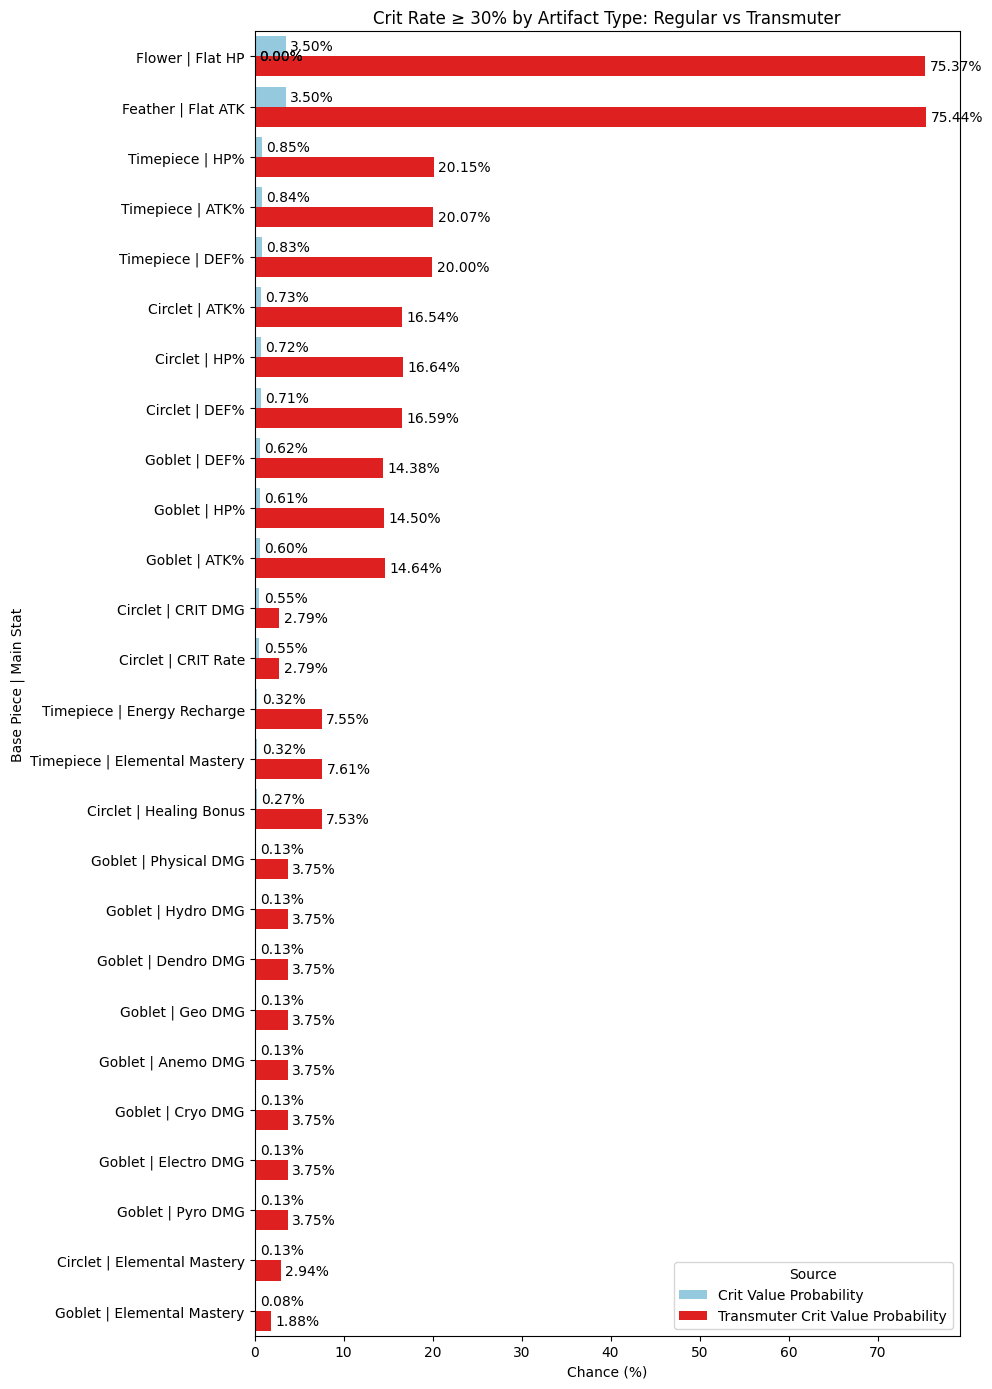

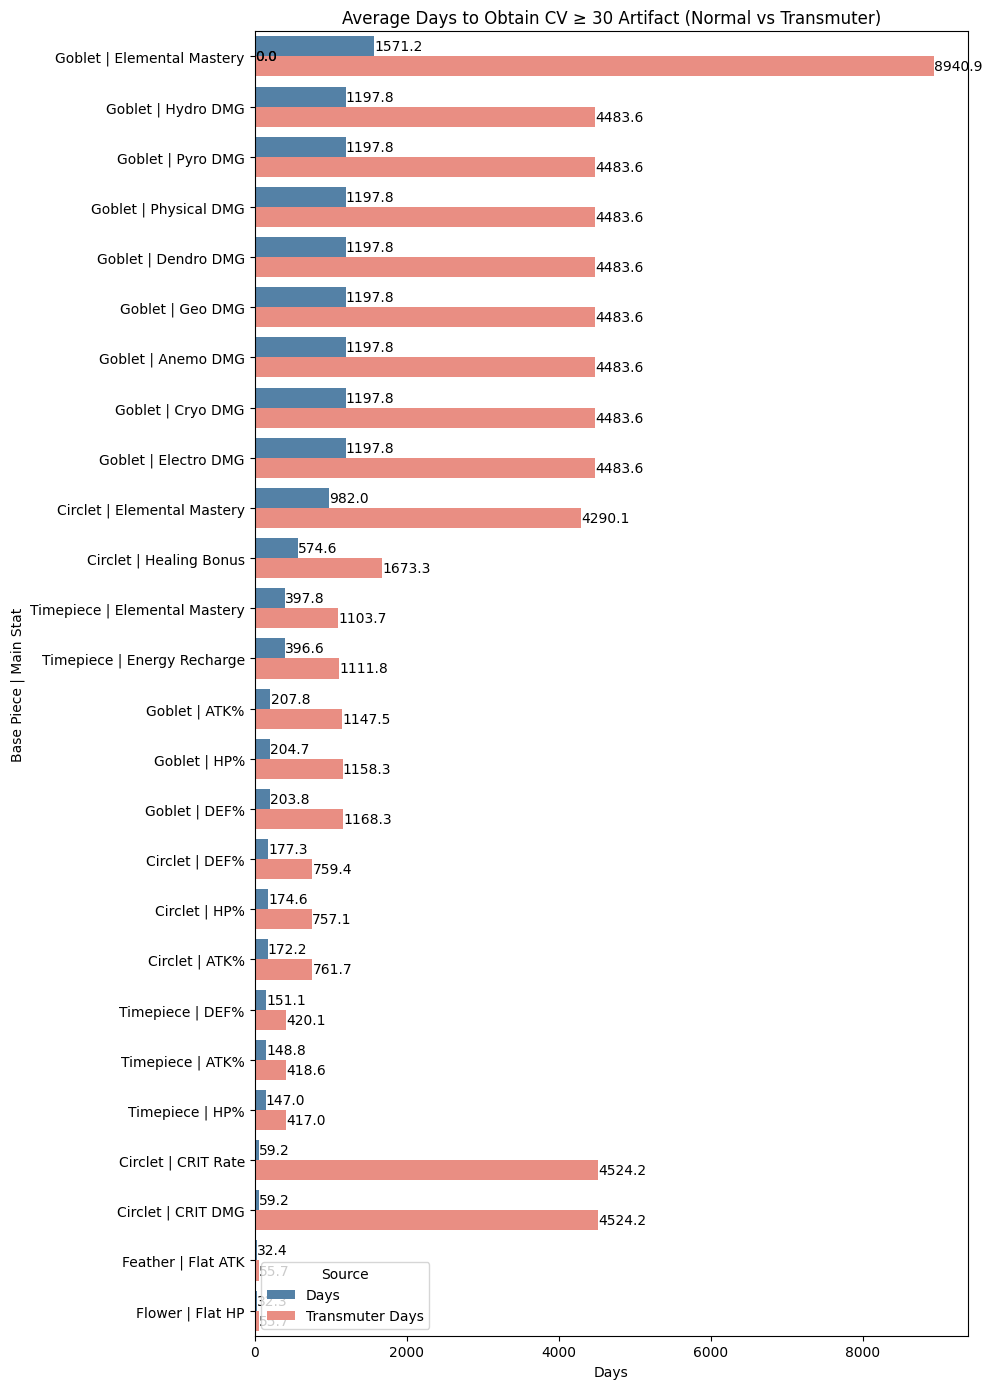

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = df_final.copy()
df["Label"] = df.index.get_level_values(0).astype(str) + " | " + df.index.get_level_values(1).astype(str)

plot_df = df[["Label", "Crit Value Probability", "Transmuter Crit Value Probability"]].melt(
    id_vars="Label",
    var_name="Source",
    value_name="Chance"
)

label_order = df.sort_values("Crit Value Probability", ascending=False)["Label"]

plt.figure(figsize=(10, 14))
ax = sns.barplot(
    data=plot_df,
    x="Chance",
    y="Label",
    hue="Source",
    order=label_order,
    palette=["skyblue", "red"]
)

for bar in ax.patches:
    value = bar.get_width()
    x = bar.get_x() + value
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        x + 0.5, y, f"{value:.2f}%", va='center', ha='left'
    )

plt.title("Crit Rate ≥ 30% by Artifact Type: Regular vs Transmuter")
plt.xlabel("Chance (%)")
plt.ylabel("Base Piece | Main Stat")
plt.legend(title="Source")
plt.tight_layout()
plt.show()

# Prepare melted DataFrame for plotting Days
days_df = df[["Label", "Days", "Transmuter Days"]].melt(
    id_vars="Label",
    var_name="Source",
    value_name="Value"  # Use a different name here to avoid conflict
)

# Sort labels by normal Days
label_order_days = df.sort_values("Days", ascending=False)["Label"]

# Plot
plt.figure(figsize=(10, 14))
ax = sns.barplot(
    data=days_df,
    x="Value",
    y="Label",
    hue="Source",
    order=label_order_days,
    palette=["steelblue", "salmon"]
)

# Add value labels at the end of each bar
for bar in ax.patches:
    value = bar.get_width()
    x = bar.get_x() + value
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        x + 3, y, f"{value:.1f}", va='center', ha='left'
    )

# Titles and labels
plt.title("Average Days to Obtain CV ≥ 30 Artifact (Normal vs Transmuter)")
plt.xlabel("Days")
plt.ylabel("Base Piece | Main Stat")
plt.legend(title="Source")
plt.tight_layout()
plt.show()

As you can see, although the crit value chance is greater when using the transmuter, the elixir timegate dramatically increases the number of days on average before a 30 cv artifact is achieved.

There are several conclusions we can derive from the entire project overall.
- **Use the transmuter whenever possible**. Players can get a limited amount of elixirs from the game without sacrificing.
- **Always transmute Goblets** as they have the most signifcant difference in chance percentage.
- **Transmuter is good, BUT the lack of elixirs heavily weigh down its value**

I would recommemd to **skip the elemental mastery goblets / circlets** when dealing with crit value as they do not normally go together.

Also, **CRIT VALUE IS NOT EVERYTHING WHEN EVALUATING AN ARTIFACT.** Please consider other stats as well, such as ATK%, Energy Recharge, and HP% (for HP scalers).

